In [120]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
from matplotlib.colors import LogNorm

from utils import distance
from utils import CommonFunctions as CF

from galib import models as HM

from seaborn import hls_palette

import importlib
importlib.reload(distance)
importlib.reload(CF)

import networkx as nx

from rpy2 import robjects

from galib import models as HM

In [3]:
N = 128

# Erdos-Renyi

True


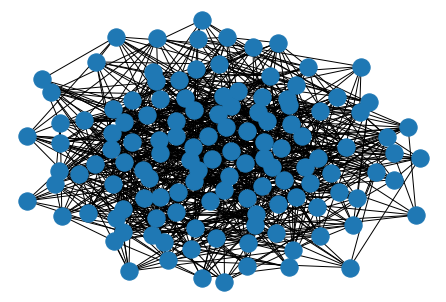

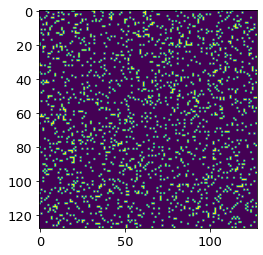

In [365]:
er = nx.erdos_renyi_graph(N, 0.11)
print(nx.is_connected(er))
er = nx.to_numpy_array(er)

nx.draw(nx.from_numpy_array(er))
plt.show()

plt.imshow(er)
plt.show()

# Barabasi

True


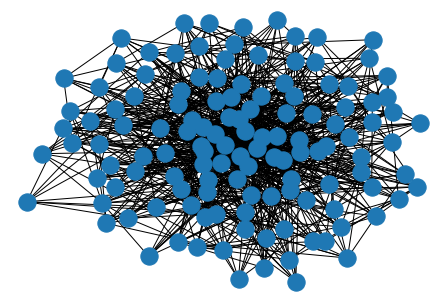

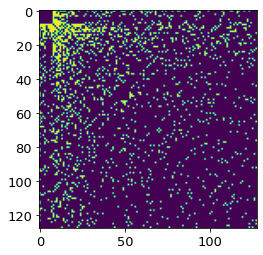

In [370]:
ba = nx.barabasi_albert_graph(N, m=8)
print(nx.is_connected(ba))
nx.draw(ba)
plt.show()

ba = nx.to_numpy_array(ba)
plt.imshow(ba)
plt.show()

# Hierarchical modular

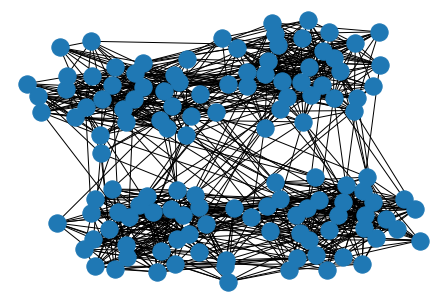

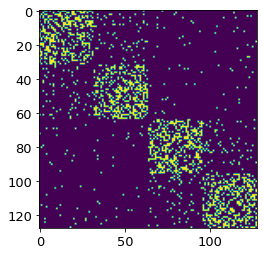

In [342]:
HMshape = [2,2,32]
avklist = [1,2,12]
adj = HM.HMRandomGraph(HMshape, avklist)

nx.draw(nx.from_numpy_array(adj))
plt.show()

plt.imshow(adj)
plt.show()

# LFR

True
n_comms: 4


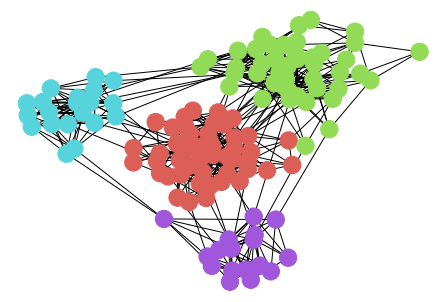

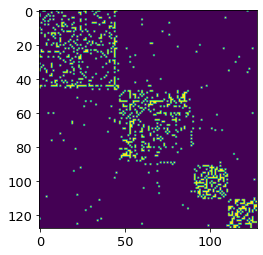

In [418]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.08
G = nx.LFR_benchmark_graph(N, tau1, tau2, mu, min_degree=4, min_community=15, max_community=120, seed=10)
G.remove_edges_from(nx.selfloop_edges(G))
print(nx.is_connected(G))
lfr = nx.to_numpy_array(G)

### Get communities
comms = []

for i in range(N):
    tmp = G.nodes[i]['community']
    
    if tmp not in comms:
        comms.append(tmp)
        
print('n_comms:', len(comms))

### Reorder nodes
lfr = nx.to_numpy_array(G)
sizes = [len(list(i)) for i in comms]
comms = [list(i) for i in comms]
comms = np.concatenate(comms)
lfr = lfr[:,comms][comms]
comms = np.concatenate([[val]*size for val, size in enumerate(sizes)])

G = nx.from_numpy_array(lfr)
palette = hls_palette(len(np.unique(comms)))
row_colors = [palette[i] for i in comms]
nx.draw(G, node_color=row_colors)
plt.show()

plt.imshow(lfr)
plt.show()

In [366]:
np.sum(adj) / N / (N-1)

0.11811023622047244

In [367]:
np.sum(er) / N / (N-1)

0.11171259842519685

In [371]:
np.sum(ba) / N / (N-1)

0.11811023622047244

In [372]:
np.sum(lfr) / N / (N-1)

0.06643700787401575

## Define dynamics

In [401]:
dynamics = ['NoisyVM', 'Epidemics', 'Epidemics', 'Population', 'Regulatory', 'Neuronal', 'Neuronal', 'Neuronal']
dynamics_short = ['Diff', 'Epi', 'Epi', 'Pop', 'Reg', 'Neu', 'Neu', 'Neu']

params = [[1,1], [1,1], [40, 1], [1,1,2,1], [1,1,1,1], [1,0.5,0.05], [1,0.5,0.05], [1,0.5,0.005]]

In [402]:
if len(dynamics) != len(dynamics_short) or len(dynamics) != len(params):
    print('not equal')

# Simulate

JACOBIAN DISTANCE
Dynamics: NoisyVM
[1, 1]


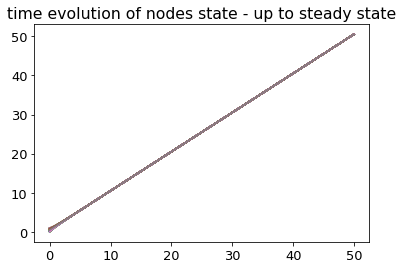

[1, 1]
Normalizing jacobian - $\lambda_{max}=$1.479820855040551
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


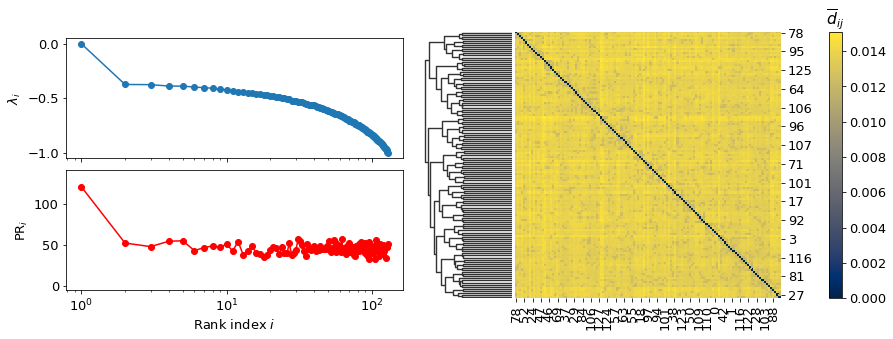

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


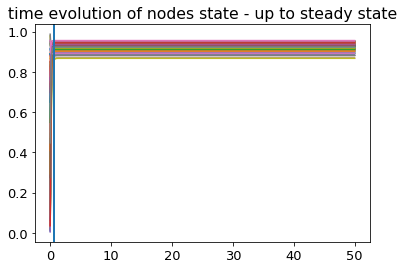

[1, 1]
Normalizing jacobian - $\lambda_{max}=$22.329070260453513
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


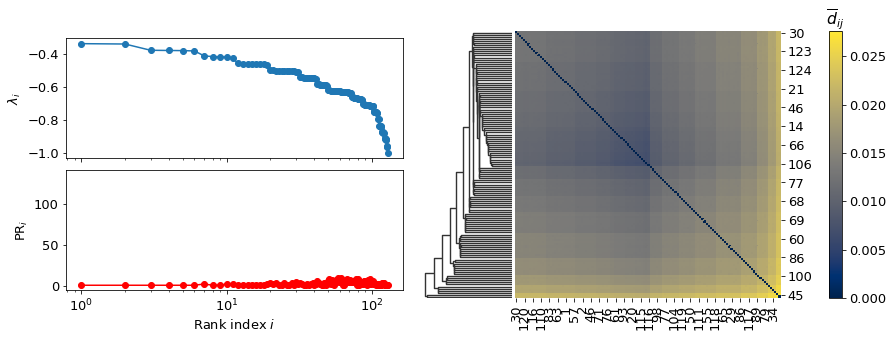

JACOBIAN DISTANCE
Dynamics: Epidemics
[40, 1]


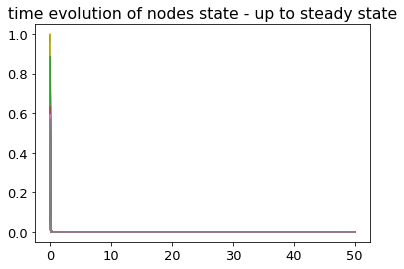

[40, 1]
Normalizing jacobian - $\lambda_{max}=$47.184443156308035
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


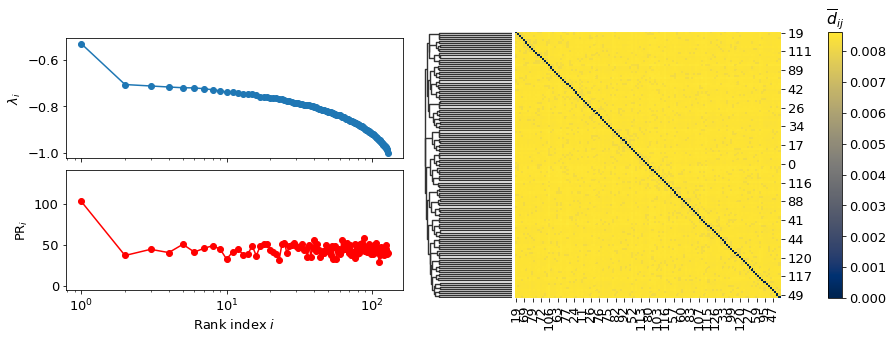

JACOBIAN DISTANCE
Dynamics: Population
[1, 1, 2, 1]


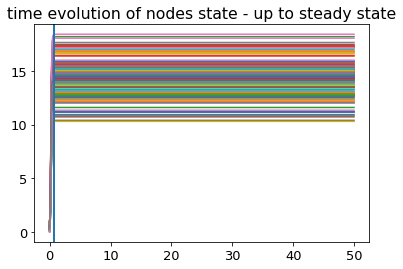

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$39.926474399175326
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


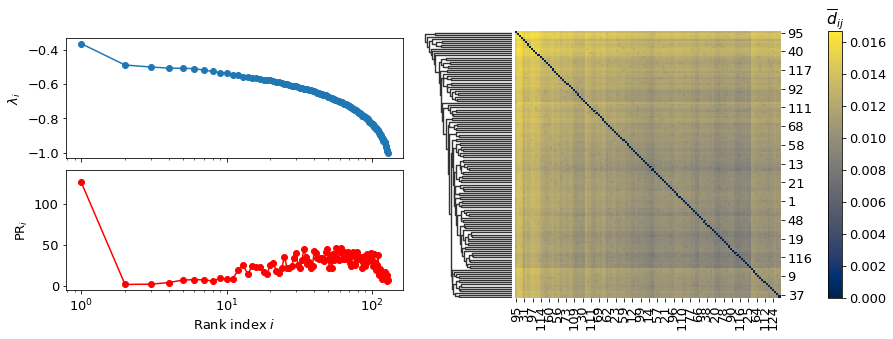

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


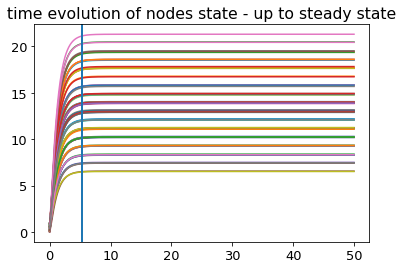

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.0378037499801276
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


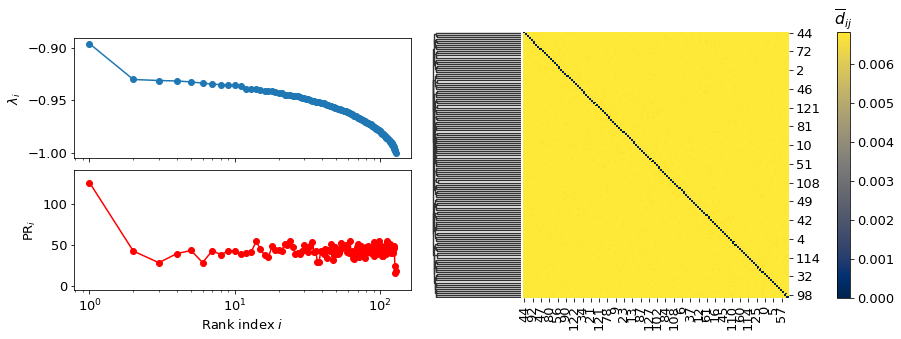

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


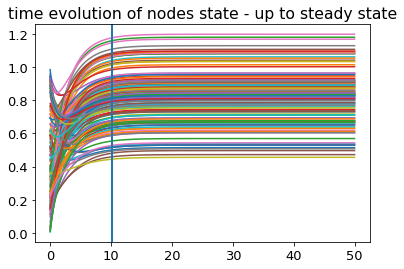

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.936627881250326
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


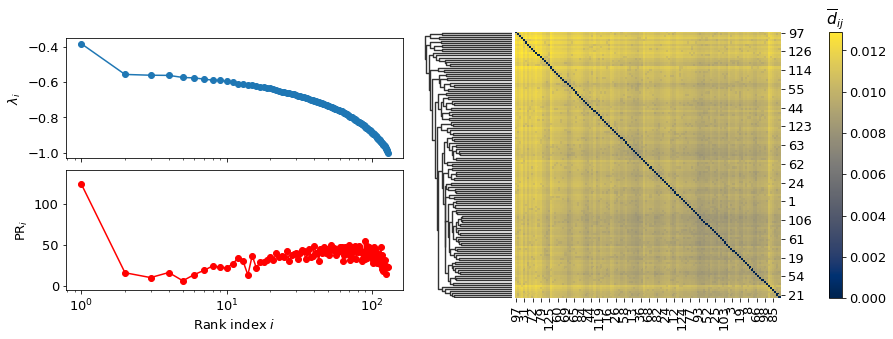

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


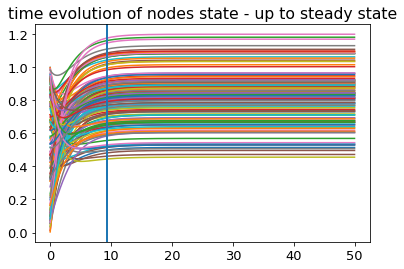

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9366278814215275
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


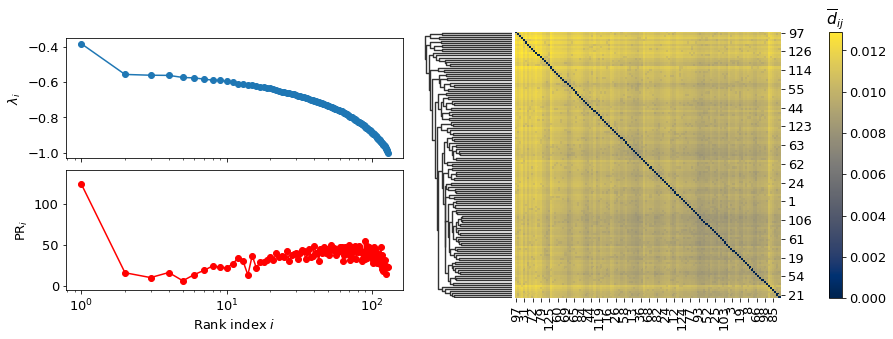

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.005]


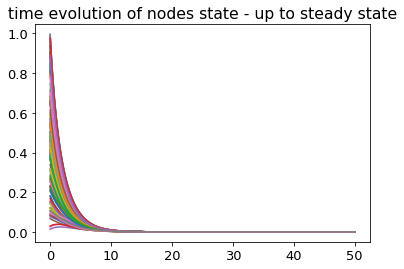

[1, 0.5, 0.005]
Normalizing jacobian - $\lambda_{max}=$0.5359222157815399
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


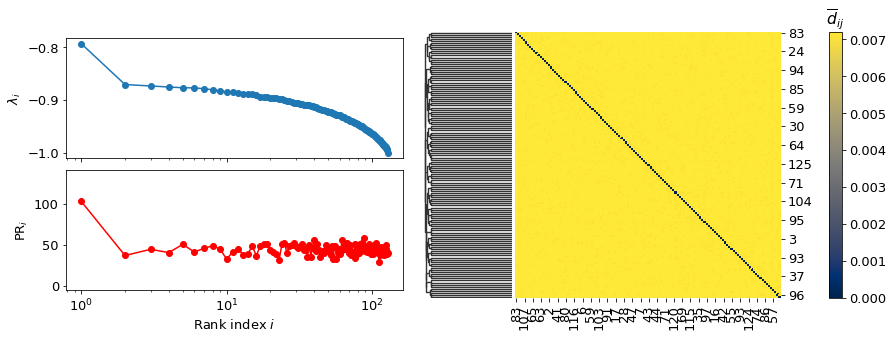

In [403]:
ress = []

for i, dynamic in enumerate(dynamics):
    res = distance.jacobian_distance(er, dynamic, norm=True, args=params[i], name=None, title=None)
    ress.append(res)

JACOBIAN DISTANCE
Dynamics: NoisyVM
[1, 1]


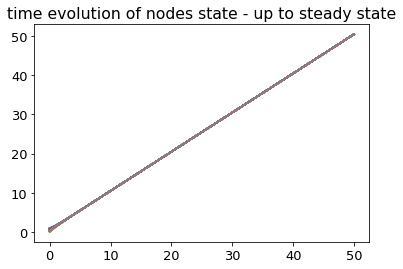

[1, 1]
Normalizing jacobian - $\lambda_{max}=$1.458210594898922
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


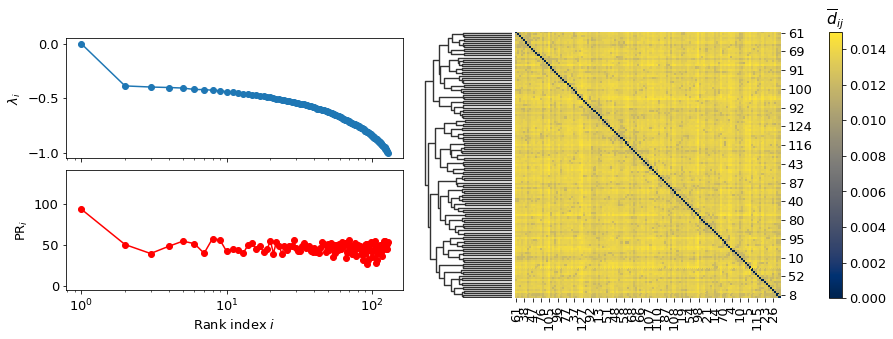

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


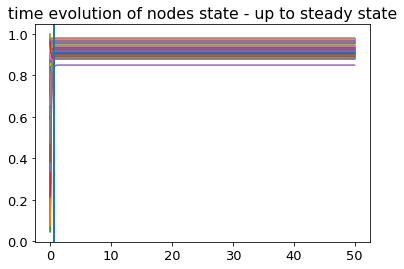

[1, 1]
Normalizing jacobian - $\lambda_{max}=$48.49961503127429
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


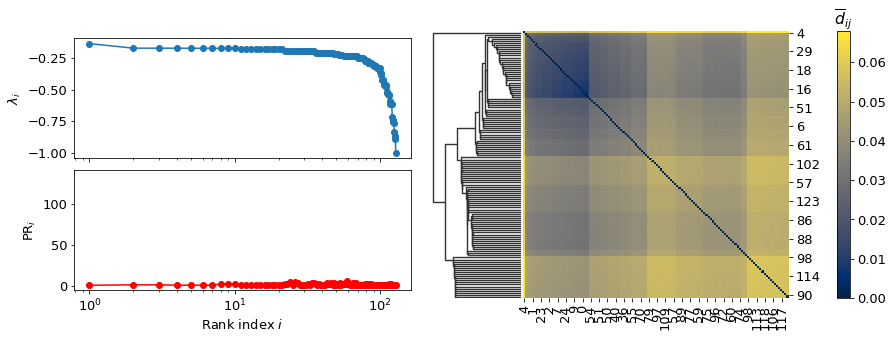

JACOBIAN DISTANCE
Dynamics: Epidemics
[40, 1]


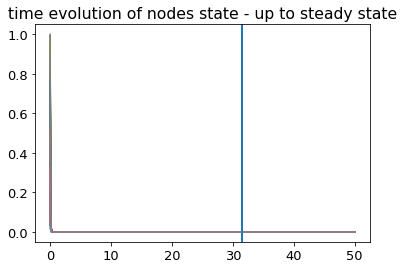

[40, 1]
Normalizing jacobian - $\lambda_{max}=$48.19367575699761
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


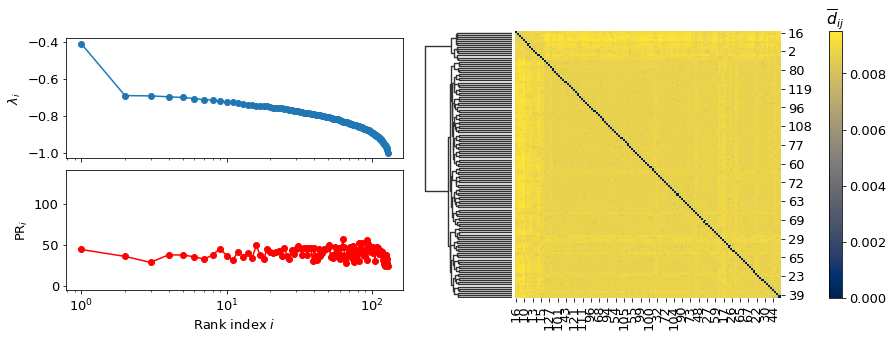

JACOBIAN DISTANCE
Dynamics: Population
[1, 1, 2, 1]


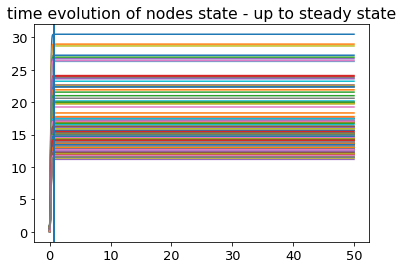

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$62.633545531642085
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


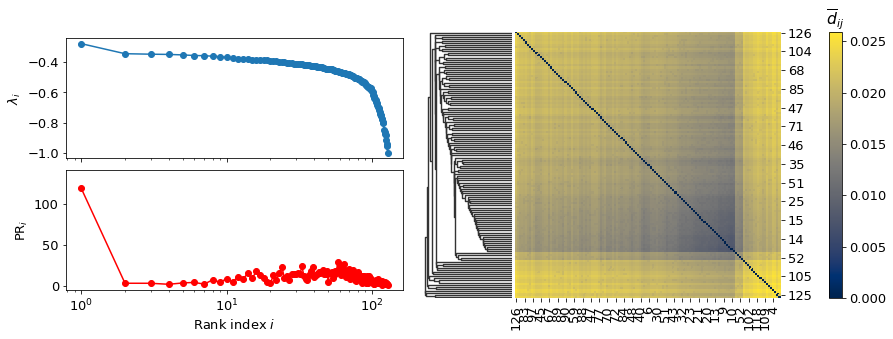

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


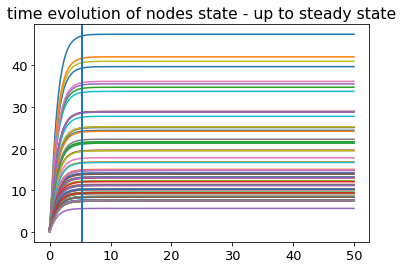

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.0374905810867734
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


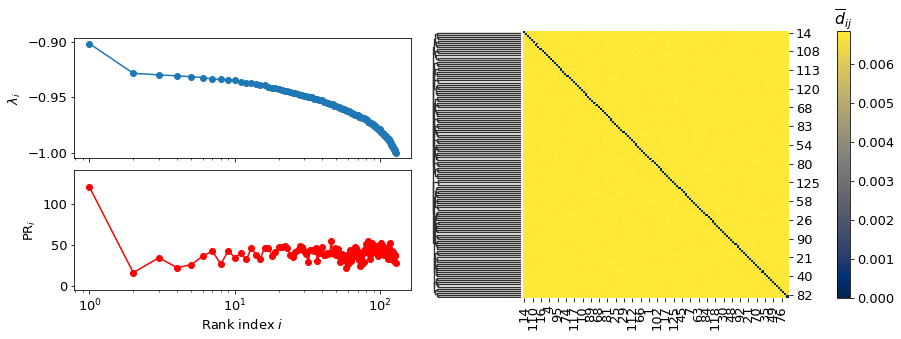

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


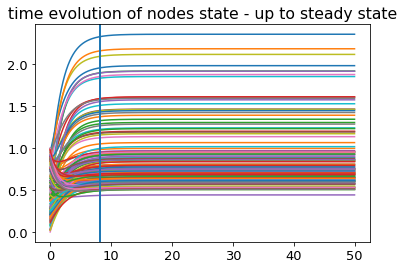

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9899434938725521
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


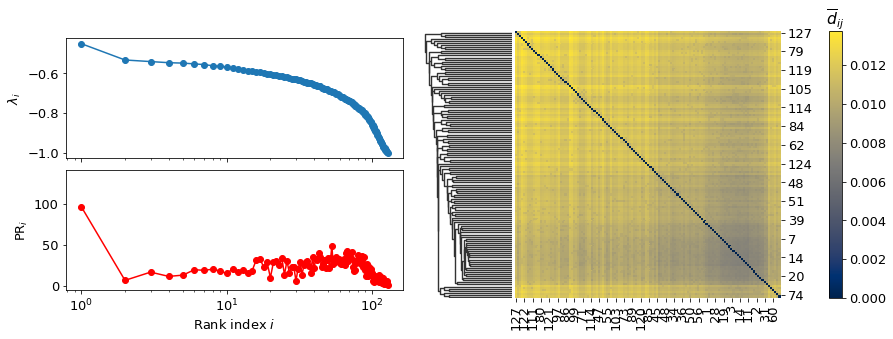

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


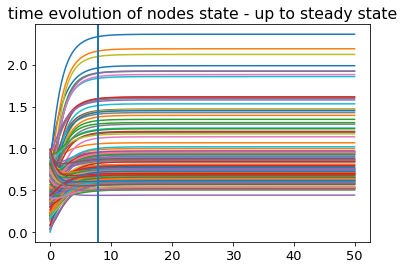

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9899434938631091
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


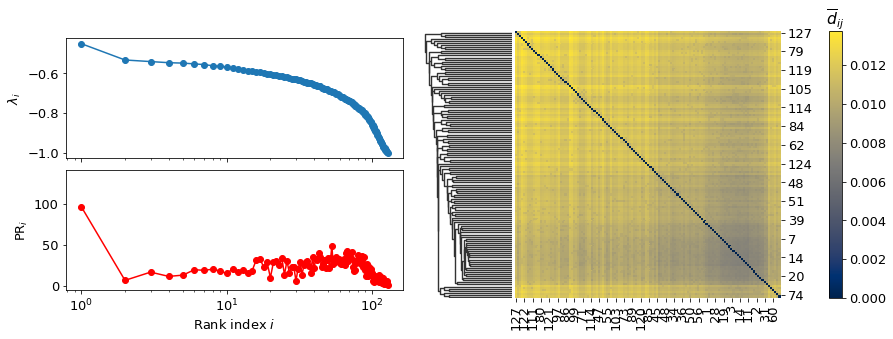

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.005]


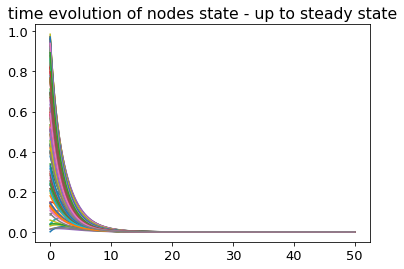

[1, 0.5, 0.005]
Normalizing jacobian - $\lambda_{max}=$0.5409683787849918
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


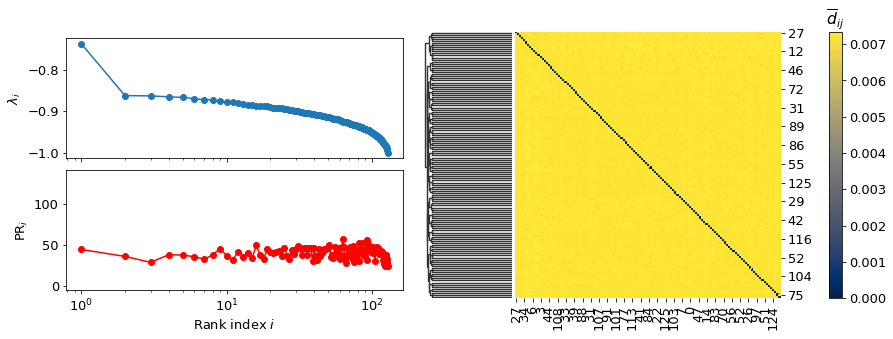

In [404]:
ress_ba = []

for i, dynamic in enumerate(dynamics):
    res = distance.jacobian_distance(ba, dynamic, norm=True, args=params[i], name=None, title=None)
    ress_ba.append(res)

JACOBIAN DISTANCE
Dynamics: NoisyVM
[1, 1]


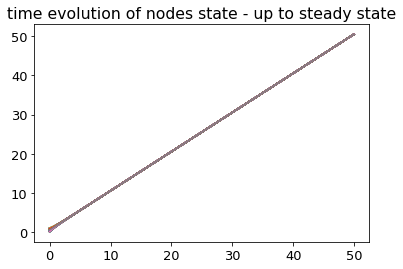

[1, 1]
Normalizing jacobian - $\lambda_{max}=$1.4185857382030111
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


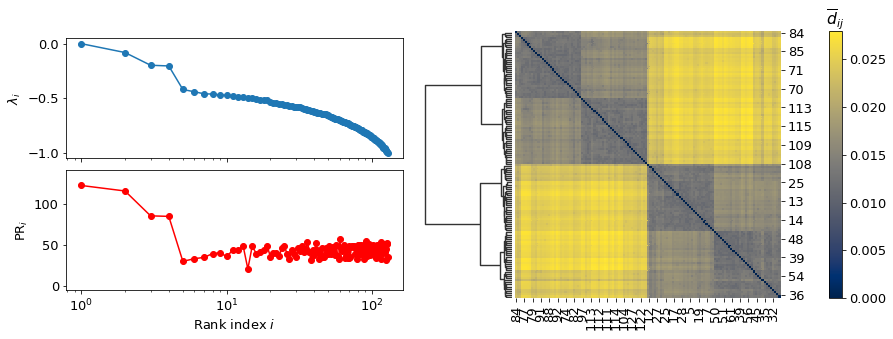

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


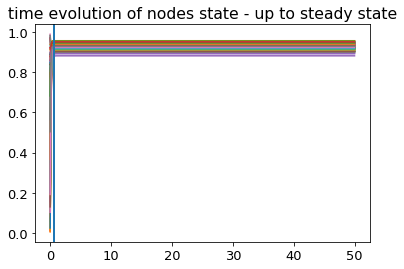

[1, 1]
Normalizing jacobian - $\lambda_{max}=$23.44641180592877
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


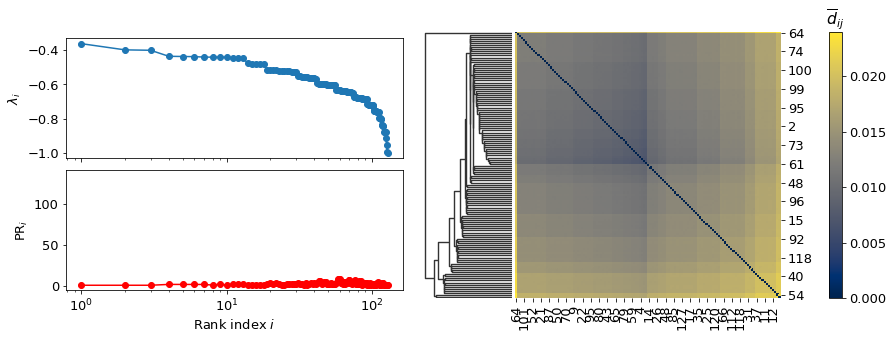

JACOBIAN DISTANCE
Dynamics: Epidemics
[40, 1]


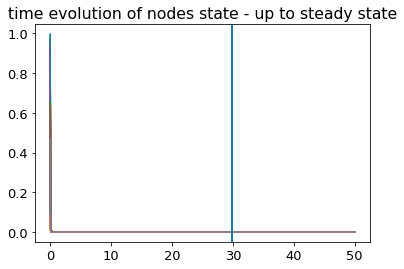

[40, 1]
Normalizing jacobian - $\lambda_{max}=$46.48278659389285
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


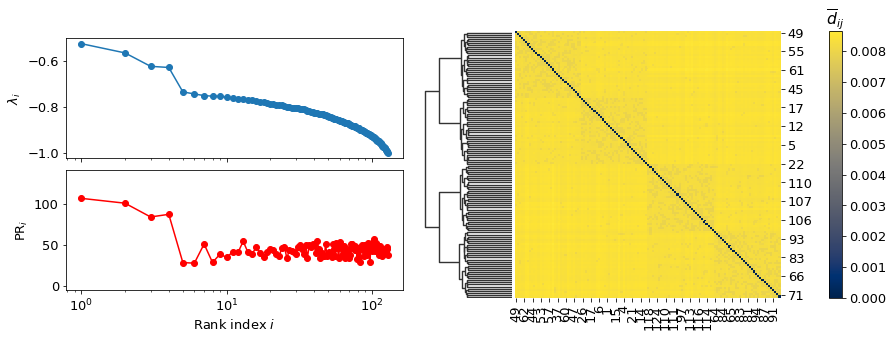

JACOBIAN DISTANCE
Dynamics: Population
[1, 1, 2, 1]


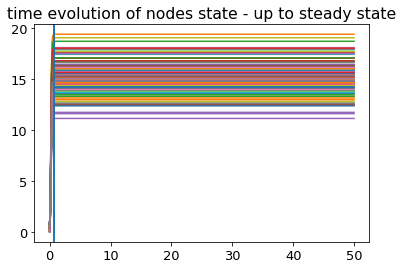

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$41.275650197275596
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


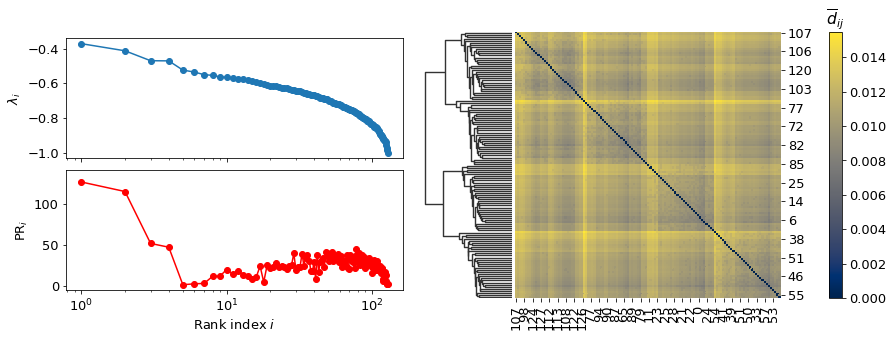

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


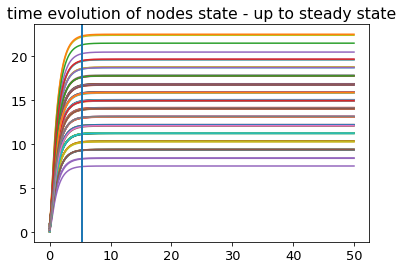

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.0316212301613021
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


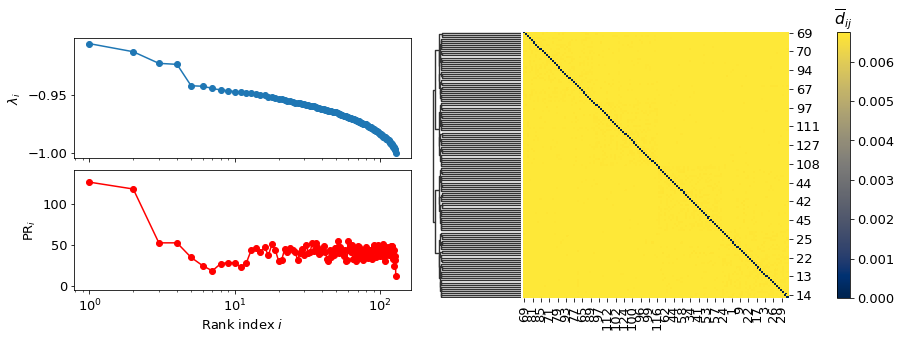

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


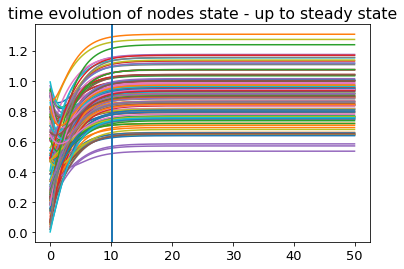

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9311223131481394
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


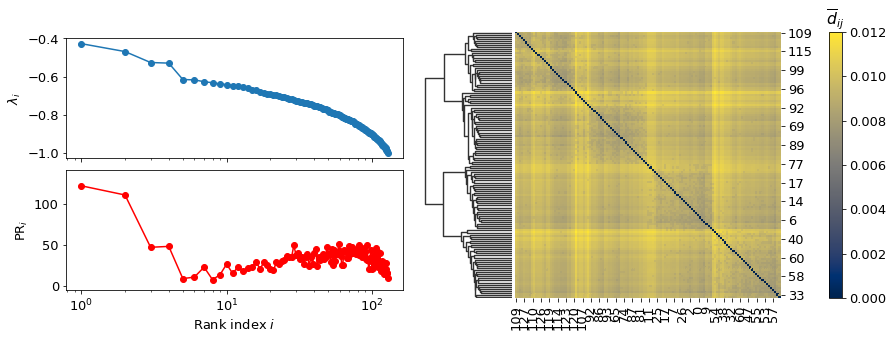

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


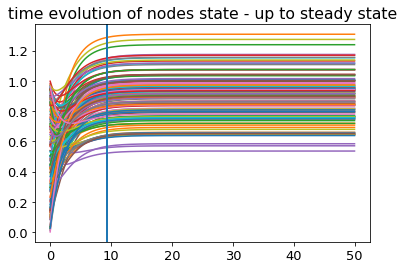

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9311223132142322
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


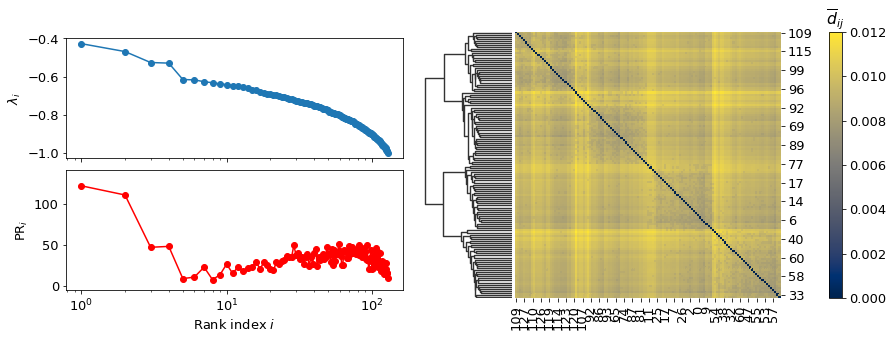

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.005]


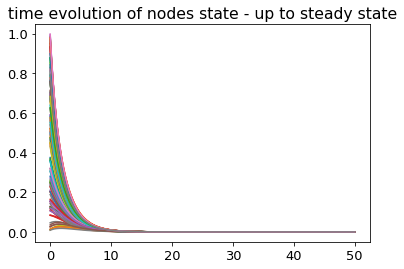

[1, 0.5, 0.005]
Normalizing jacobian - $\lambda_{max}=$0.5324139329694656
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


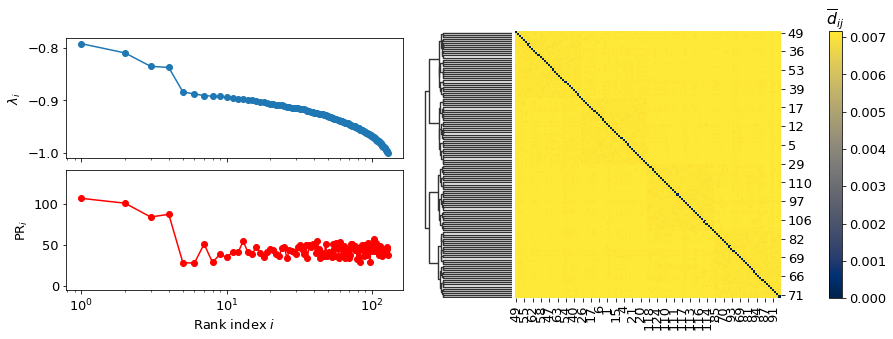

In [405]:
ress_hm = []

for i, dynamic in enumerate(dynamics):
    res = distance.jacobian_distance(adj, dynamic, norm=True, args=params[i], name=None, title=None)
    ress_hm.append(res)

JACOBIAN DISTANCE
Dynamics: NoisyVM
[1, 1]


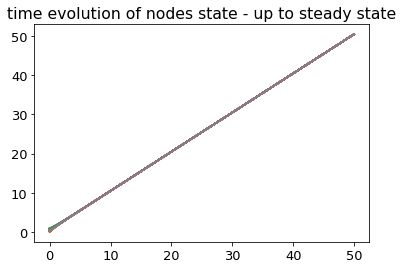

[1, 1]
Normalizing jacobian - $\lambda_{max}=$1.5798585616544154
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


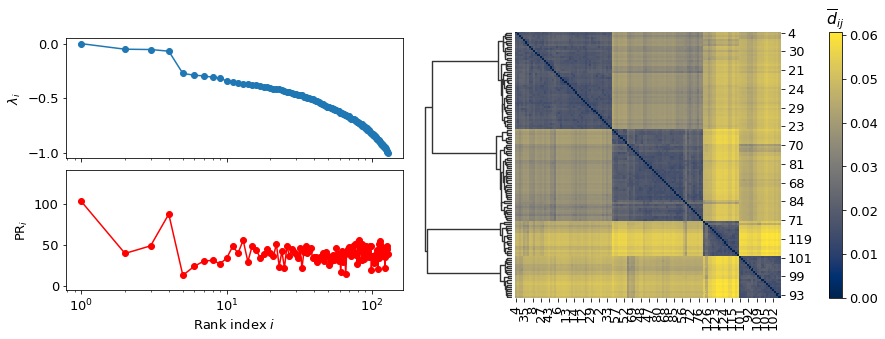

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


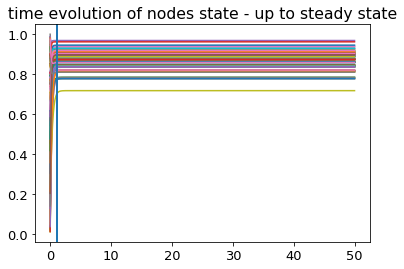

[1, 1]
Normalizing jacobian - $\lambda_{max}=$31.87428559964279
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


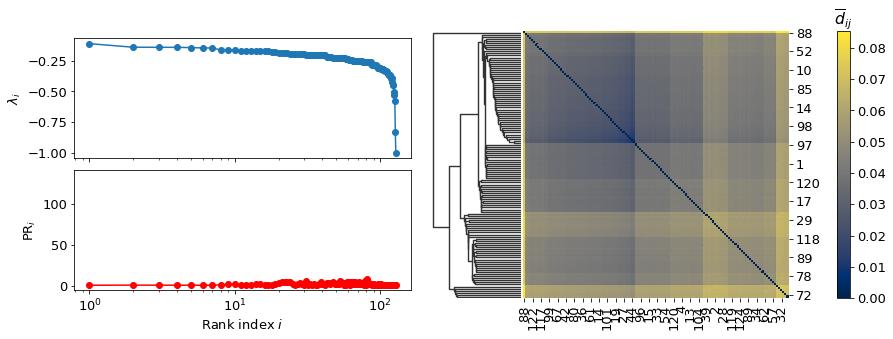

JACOBIAN DISTANCE
Dynamics: Epidemics
[40, 1]


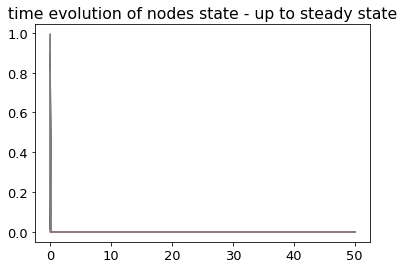

[40, 1]
Normalizing jacobian - $\lambda_{max}=$45.74020599211253
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


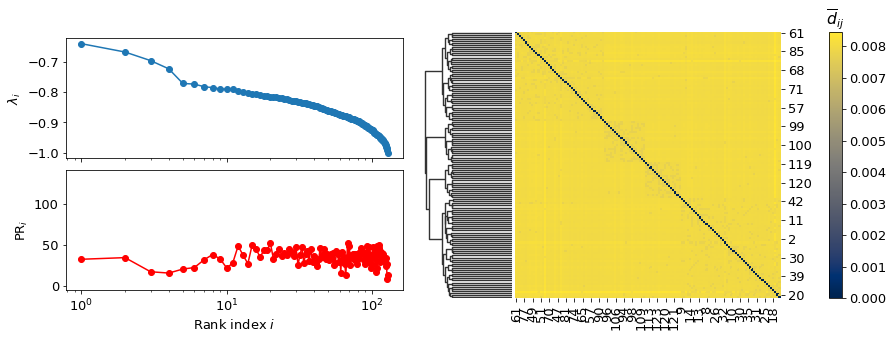

JACOBIAN DISTANCE
Dynamics: Population
[1, 1, 2, 1]


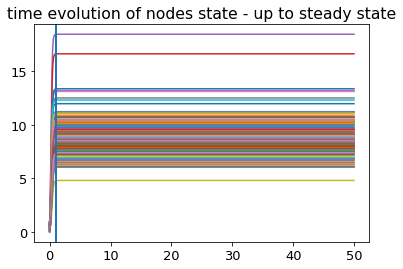

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$38.41587509281027
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


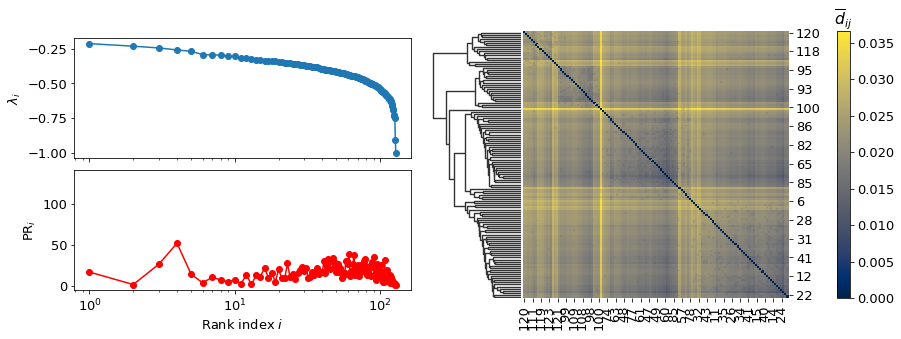

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


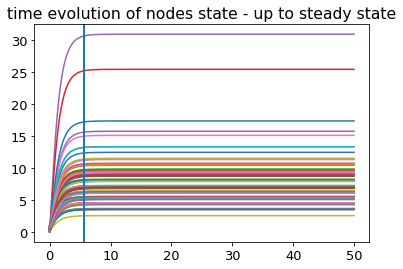

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.084037772802814
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


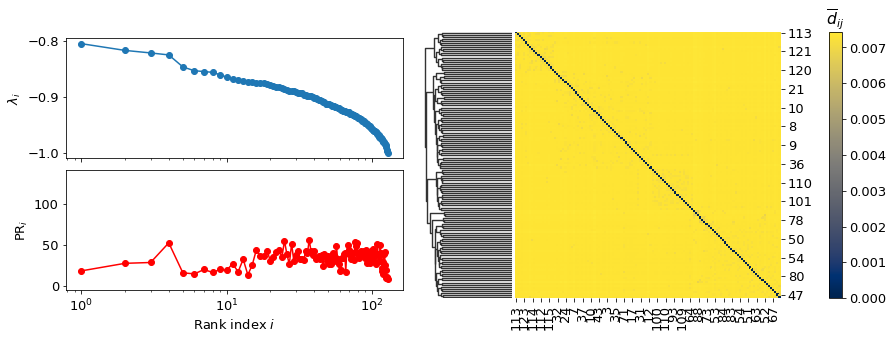

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


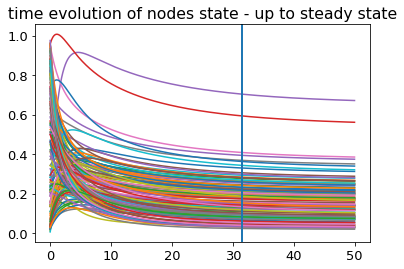

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.8140507977063098
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


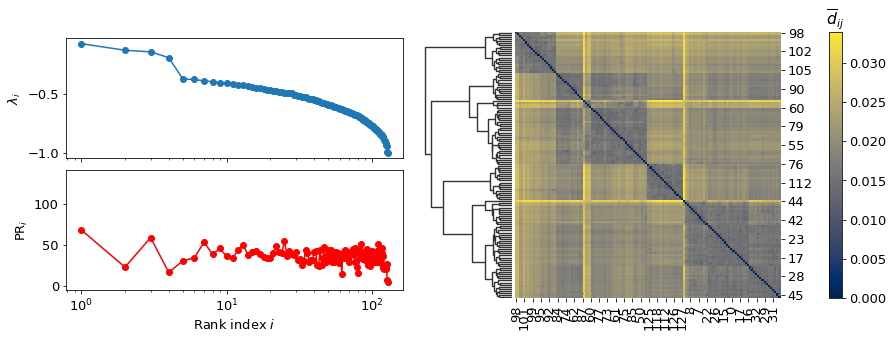

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.05]


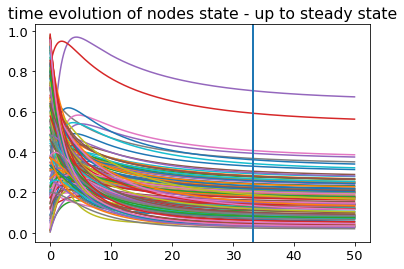

[1, 0.5, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.8142517786154724
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


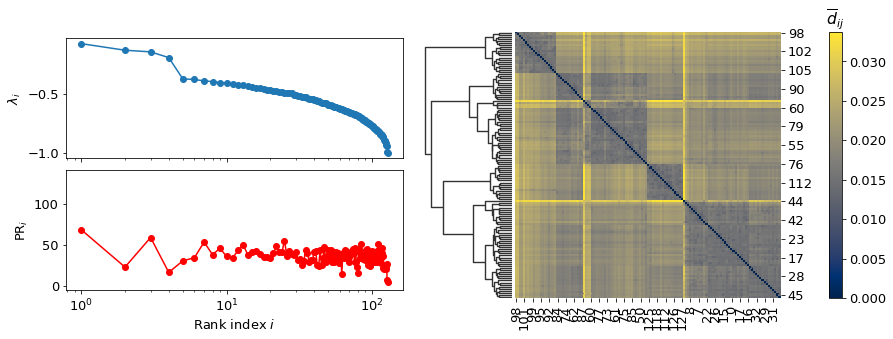

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.5, 0.005]


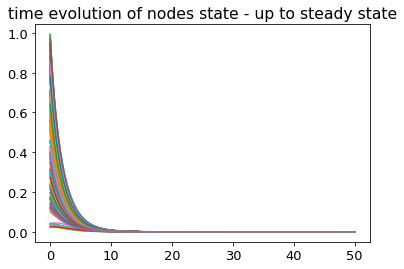

[1, 0.5, 0.005]
Normalizing jacobian - $\lambda_{max}=$0.5287010299605632
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:265: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


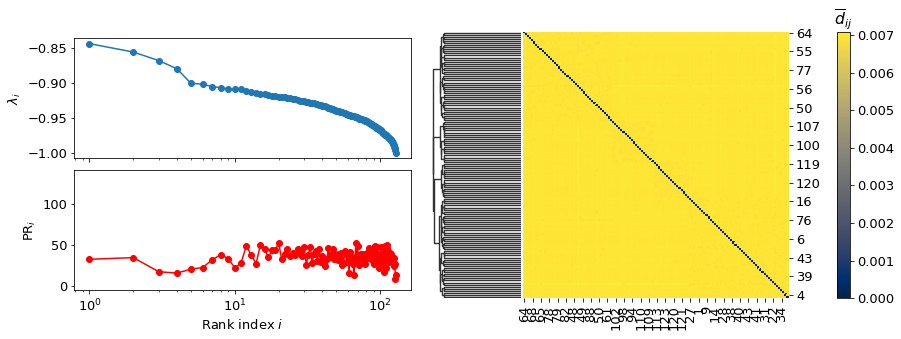

In [406]:
ress_lfr = []

for i, dynamic in enumerate(dynamics):
    res = distance.jacobian_distance(lfr, dynamic, norm=True, args=params[i], name=None, title=None)
    ress_lfr.append(res)

In [419]:
all_res = [ress, ress_ba, ress_hm]

idx = np.triu_indices(N,1)

tt_er = er.sum(axis=0) * er.sum(axis=0)[:,None]
tt_ba = ba.sum(axis=0) * ba.sum(axis=0)[:,None]
tt_hm = adj.sum(axis=0) * adj.sum(axis=0)[:,None]
tt_lfr = lfr.sum(axis=0) * adj.sum(axis=0)[:,None]

tts = [tt_er, tt_ba, tt_hm]
nets = [er, ba, adj]
names = ['Erdos-Renyi', 'Albert-Barabasi', 'Hierarchical Modular']

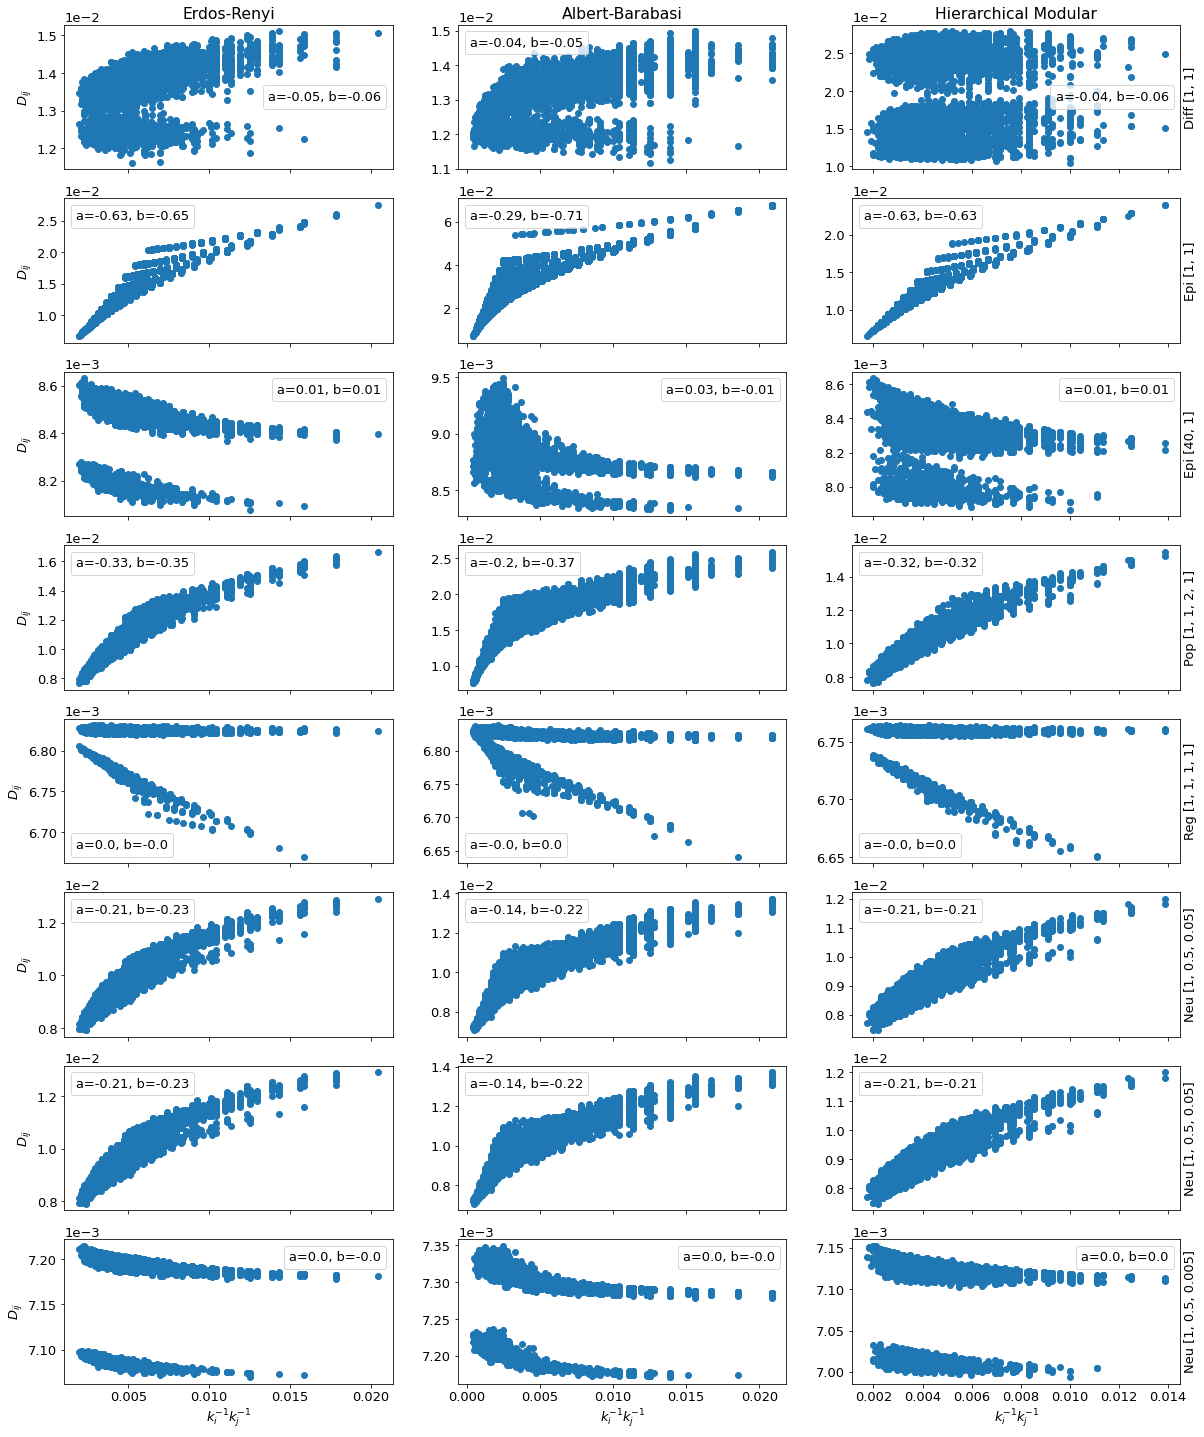

In [420]:
fig, axs = plt.subplots(nrows=len(dynamics), ncols=len(nets), sharex='col', figsize=(20,25))

for i, dynamic in enumerate(dynamics):
    for j in range(len(all_res)):
        x1 = 1/tts[j][idx]
        x2 = all_res[j][i][0][idx]
        
        # Fit
        a, b, _ = fit_dist(all_res[j][i][0], nets[j])
        
        # Plot
        plt.sca(axs[i,j])
        plt.plot(x1, x2, 'o')
        plt.plot([], [], label=f'a={np.round(a,2)}, b={np.round(b,2)}')
        #plt.legend()
        
        leg = axs[i,j].legend(handlelength=0, handletextpad=0, fancybox=True)
        for item in leg.legendHandles:
            item.set_visible(False)
        
        axs[i,j].ticklabel_format(axis='y',style='sci', scilimits=(0,0))
        
        if i==0:
            plt.title(names[j])
        if i==len(dynamics)-1:
            plt.xlabel(r'$k_i^{-1}k_j^{-1}$')
        if j==0:
            plt.ylabel(r'$D_{ij}$')
        
        if j==len(nets)-1:
            axs[i,j].yaxis.set_label_position("right")
            axs[i,j].set_ylabel(dynamics_short[i]+' '+str(params[i])) 

#plt.xlabel()
#plt.tight_layout()
plt.show()

# Focus on epidemics dynamics